# Graded Challenge 2 (Logistic Regression & SVM )

# بِسْمِ ٱللّٰهِ ٱلرَّحْمٰنِ ٱلرَّحِيمِ‎
---
## Introduction

**Nama : Luthfi Fadhlillah**
<br>
**Batch : FTDS 009**

Kumpulan data yang akan digunakan berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia.

---


## Objectives

Melakukan proses analisis untuk memprediksi apakah akan terjadi hujan di hari esok atau tidak berdasarkan dataset yang disedikan dan features yang terdapat dalam dataset. Diperlakukan pemahaman data (Data Understanding) sebelum melakukan proses analisis sehingga dapat menentukan features mana saja yang memiliki korelasi dan berdampak terhadap feature lainnya. 

---

**Informasi Dataset**


*   **Date** : Tanggal pengamatan
*   **Location** : Nama umum lokasi stasiun cuaca
* **MinTemp** : Suhu minimum dalam derajat celsius
* **MaxTemp** : Suhu maksimum dalam derajat celsius
* **Rainfall** : Jumlah curah hujan yang tercatat untuk hari itu dalam mm
* **Evaporation**: Disebut sebagai proses penguapan Kelas A (mm) dalam 24 jam hingga jam 9 pagi
* **Sunshine** : Jumlah jam sinar matahari cerah dalam sehari.
* **WindGustDir** : Arah hembusan angin terkuat dalam 24 jam hingga tengah malam
* **WinGustSpeed** : Kecepatan (km/jam) hembusan angin terkuat dalam 24 jam hingga tengah malam
* **WinDir9am** : Arah angin pada jam 9 pagi
* **WinDir3pm** : Arah angin pada jam 3 pagi
* **WindSpeed9am** : Kecepatan angin (km/jam) rata-rata selama 10 menit sebelum jam 9 pagi
* **WindSpeed3pm** : Kecepatan angin (km/jam) rata-rata selama 10 menit sebelum jam 3 sore
* **Humidity9am** : Kelembaban (persen) pada jam 9 pagi
* **Humidity3pm** : Kelembaban (persen) pada jam 3 sore
* **Pressure9am** : Tekanan atmosfer (hpa) berkurang menjadi rata-rata permukaan laut pada pukul 9 pagi
*  **Pressure3pm** : Tekanan atmosfer (hpa) berkurang menjadi rata-rata permukaan laut pada pukul 3 sore
* **Cloud9am** : Bagian langit yang tertutup awan pada pukul 9 pagi. Ini diukur dalam "okta", yang merupakan satuan delapan. Ini mencatat berapa perdelapan langit yang tertutup awan. Ukuran 0 menunjukkan langit yang benar-benar cerah sementara angka 8 menunjukkan bahwa itu benar-benar mendung.
* **Cloud3pm** : Bagian langit yang tertutup awan (dalam "oktas": seperdelapan) pada jam 3 sore.
* **Temp9am** : Suhu (derajat C) pada jam 9 pagi
* **Temp3pm** : Suhu (derajat C) pada jam 3 sore
* **RainToday** : Boolean: 1 jika curah hujan (mm) dalam 24 jam hingga 9 pagi melebihi 1 mm, jika tidak 0
* **RainTomorrow** : Jumlah hujan hari berikutnya dalam mm. Digunakan untuk membuat variabel respon RainTomorrow. Semacam ukuran "risiko".


## Import Libraries
Melakukan import pustaka yang dibutuhkan dalam proses analisis dataset.

---

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import shuffle

import warnings 
warnings.filterwarnings('ignore')

## Data Loading

In [120]:
data = pd.read_csv('weatherAUS.csv')

In [121]:
data.shape

(145460, 23)

In [122]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Dataset memiliki 145460 baris dan 23 kolom

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
data['Location'].nunique()

49

In [8]:
data['Sunshine'].unique()

array([ nan, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. ,
       12. ,  3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4,
       10.8,  7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  6.2,  9.8,  9.9,  4.3,
        8. ,  9.6, 10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,
        9.4,  9.7,  0.6,  5.1,  8.3,  4.1,  3.9,  6.8,  8.6,  2.7,  8.2,
        3.1,  1.8,  0.1,  0.8,  3.4,  7.1,  5. ,  5.7,  6.1,  7. ,  2.9,
        2.5,  4.6,  8.9,  9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,
        3.5,  9.2,  1.9, 11.7, 11.9,  7.7,  0.9, 12.5,  2.1, 12.8, 13.7,
        8.5,  0.2,  4. ,  2.4,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,
        1.5,  3.3,  6.5,  2.6,  3.8,  3.6,  3.2,  6.7,  5.4,  7.2,  4.9,
        1. ,  1.6,  5.3,  7.3,  5.6,  1.3, 13.8, 13.5, 14. , 13.9, 14.1,
       14.5, 14.3, 14.2])

In [9]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

## Exploratory Data Analysis (EDA)

Melakukan pengecekan terhadap Missing values yang terdapat dalam datasets beserta persentasenya.

---



In [10]:
missing = pd.DataFrame(data.isnull().sum(), columns=['Jumlah Missing Values'])
missing['% Missing Values'] = (missing/len(data)).round(2)*100
missing

,Jumlah Missing Values,% Missing Values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


Column **Evaporation**, **Sunshine**, **Cloud9am**, **Cloud3pm** memiliki banyak missing values yaitu diatas **35%**.

Target yang akan digunakan adalah column **RainTomorrow** yang memiliki **2% missing value**.

Saya akan men-drop missing value dalam column target dan juga mempertimbangkan untuk menghapus column yang berisi banyak missing values tetapi setelah saya memeriksa korelasi antara fitur-fiturnya.

Distribusi kolom numerik

---

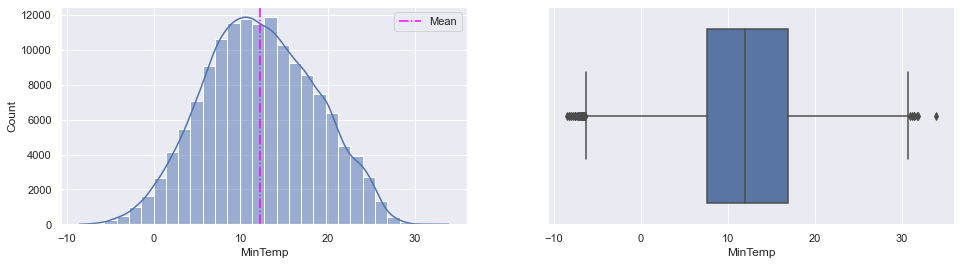

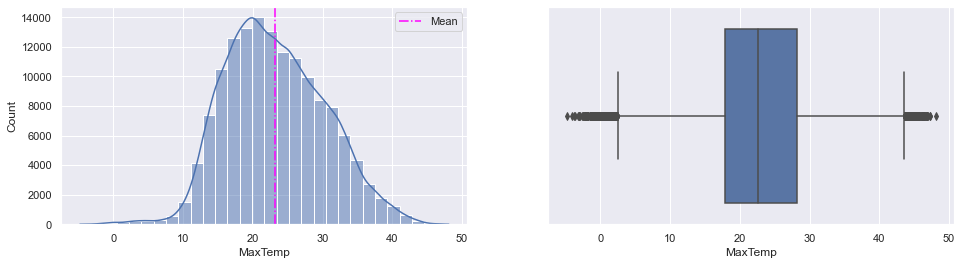

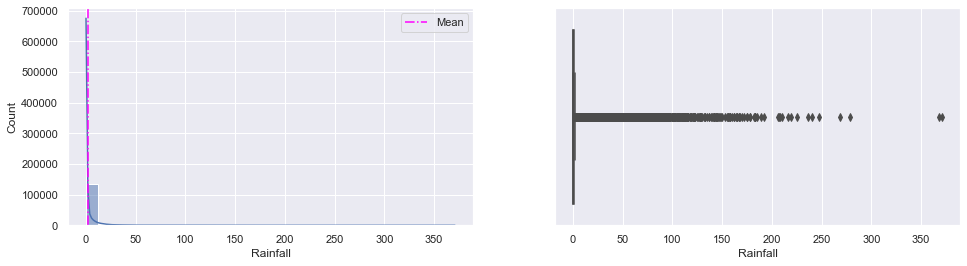

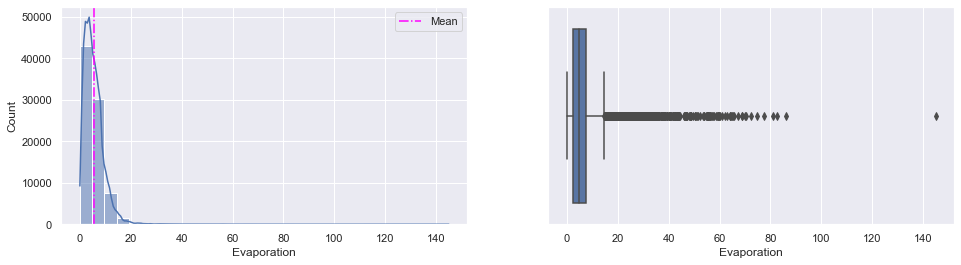

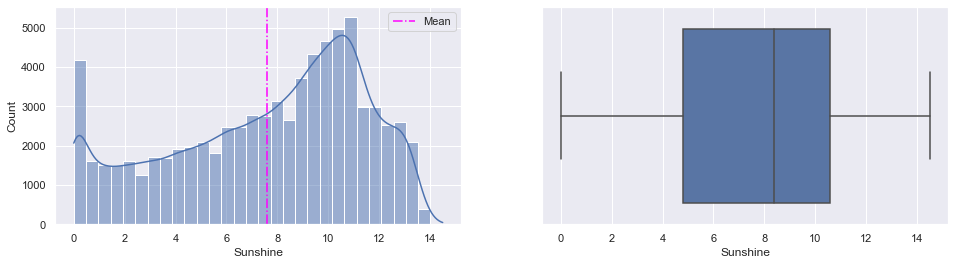

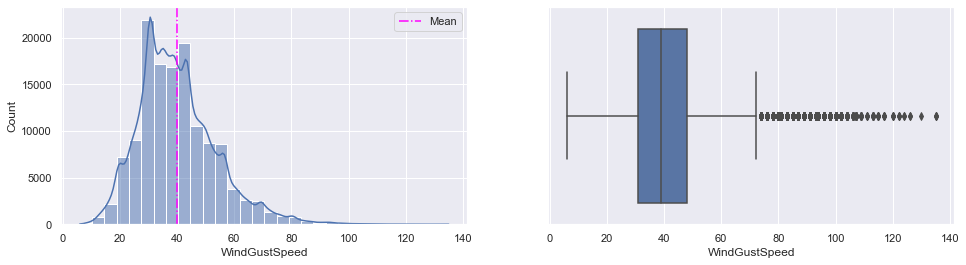

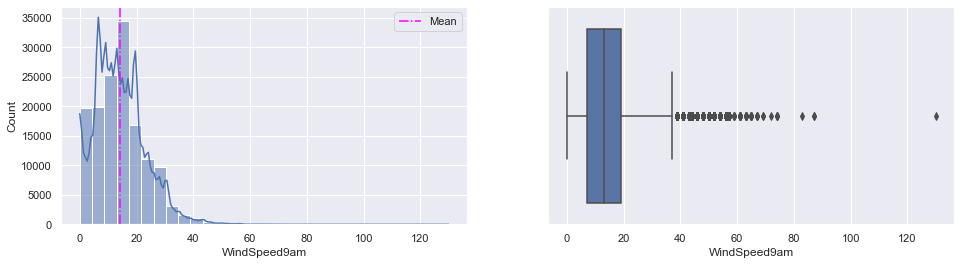

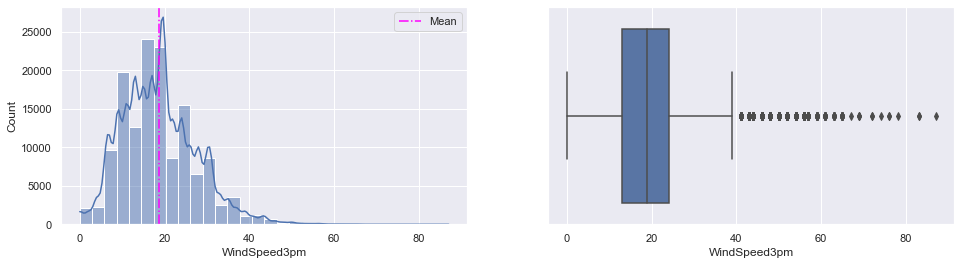

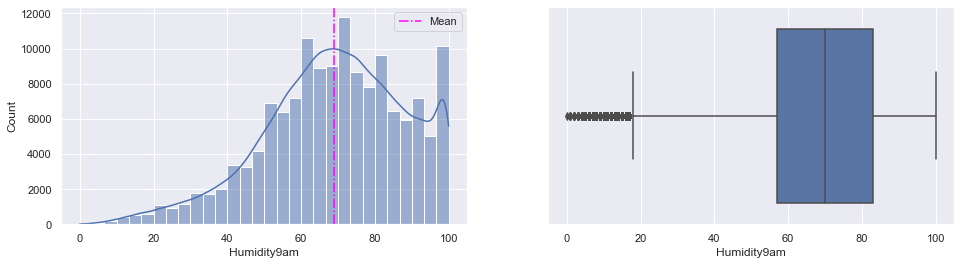

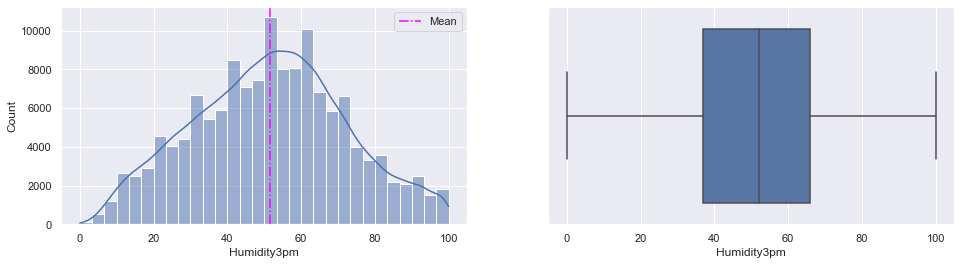

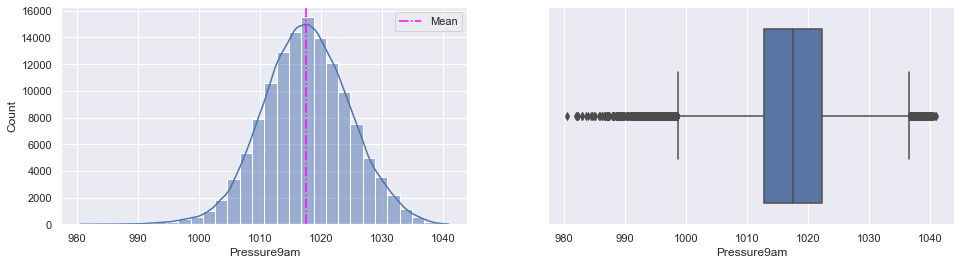

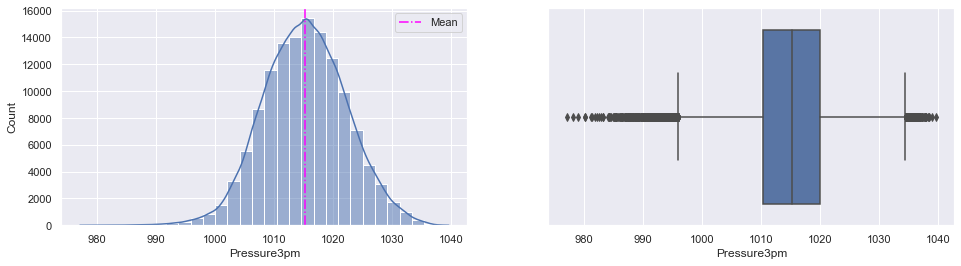

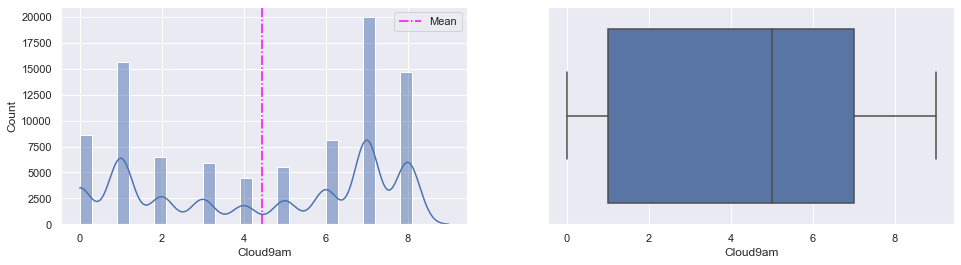

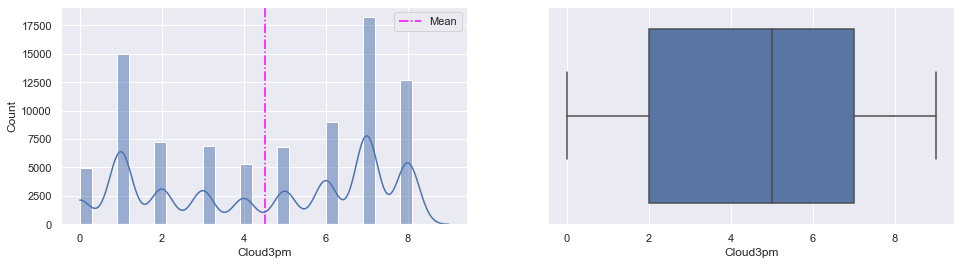

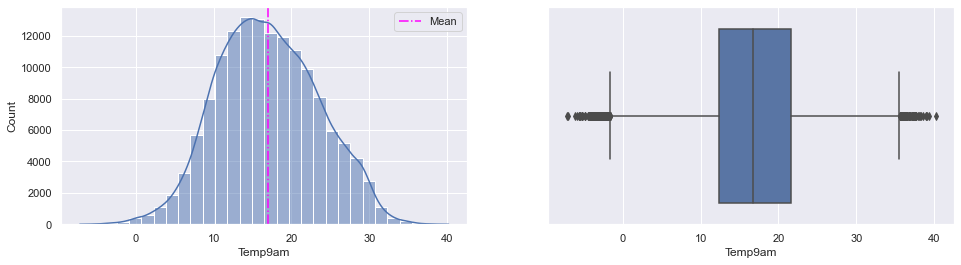

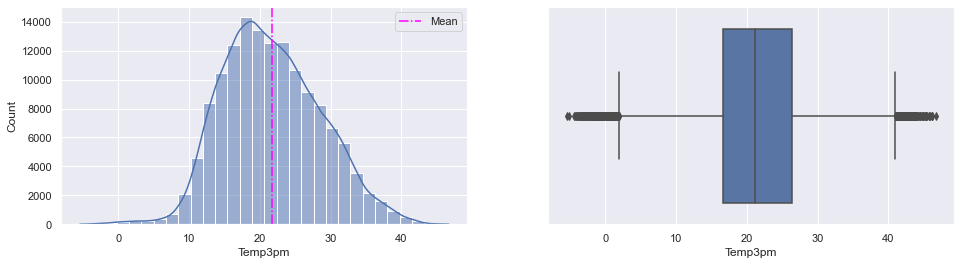

In [124]:
num_col = data._get_numeric_data()

for i in num_col:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_col[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_col[i], ax = axs[1])

  axs[0].axvline(num_col[i].mean(), color='magenta', linestyle='dashdot', label = 'Mean')
  axs[0].legend()

Terlihat bahwa column **Sunshine** memiliki distorsi yang sangat besar, saya kemungkinan akan melakukan drop terhadap column tersebut, tetapi sayaa harus memeriksa korelasinya terlebih dahulu

Melakukan pengecekan korelasi kolom numerik

---

<AxesSubplot:>

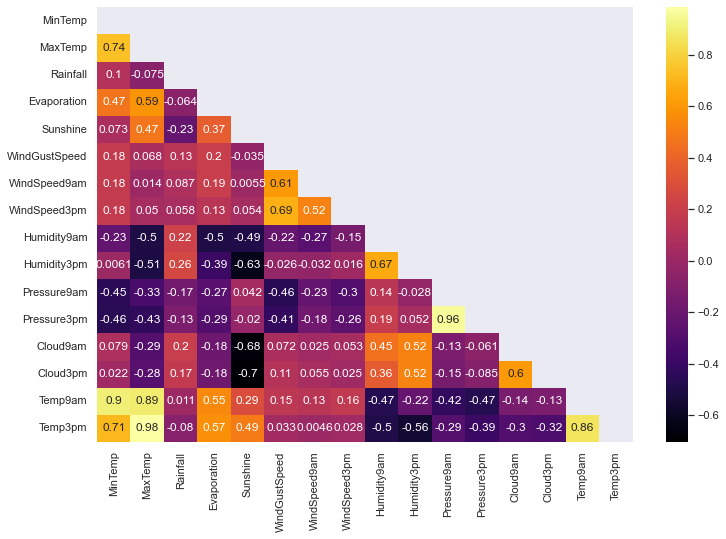

In [126]:
plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(), annot = True,cmap = 'inferno',mask = mask)

Fitur yang memiliki korelasi kuat berarti mereka bergantung secara linier dengan fitur lain, sehingga berkontribusi lebih sedikit dalam memprediksi tetapi meningkatkan biaya komputasi.

Berikut adalah fitur-fitur yang memiliki korelasi di atas 85%:

- MinTemp - Temp9am (90%)
- MaxTemp - Temp3pm (98%)
- MaxTemp - Temp9am (90%)
- Pressure9am - Pressure3pm (96%)
- Temp9am - Temp3pm (86%)

**Berapa persentase setiap nilai dalam target?**

Karena kita akan menggunakan feature `RainTomorrow` sebagai target, maka saya akan mengecek persentasenya setiap nilai dalam kolom target.

<AxesSubplot:ylabel='RainTomorrow'>

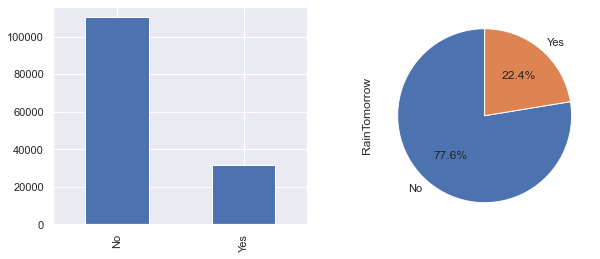

In [127]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
data['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
data['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

Ada dua nilai di dalam kolom `RainTomorow` yang menjadi data target yaitu `Yes` dan `No`. Yes artinya hujan terjadi di lokasi dan tanggal tertentu sedangkan No artinya tidak terjadi hujan.

**Yes** persentasenya sekitar **22,4%** dan **No** prosentasenya adalah **77,6%**, yang bisa dikatakan bahwa datanya **inbalance**, makanya hal ini akan coba saya masukkan pertimbangan dalam mengolah data

**Apakah `Wind Speed` memiliki dampak terhadap `RainTomorrow`?**

Terdapat 3 kolom berbeda dalam `Wind Speed`, saya akan mengecek setiap kolom apakah berdampak terhadap kolom `RainTomorrow`

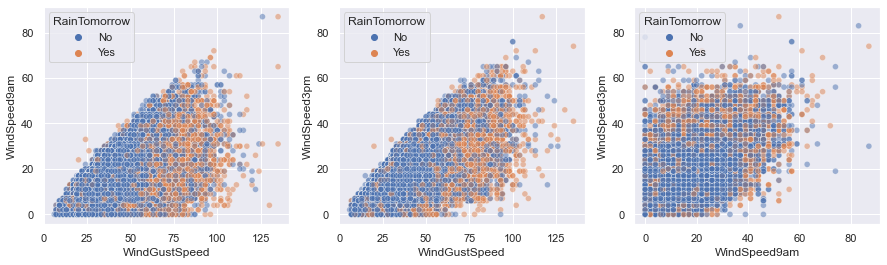

In [128]:
wind_speed = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
wind_speed_combination = [i for i in combinations(wind_speed,2)]
fig, axs = plt.subplots(1,3,figsize=(15, 4))
for i, ws in enumerate(wind_speed_combination):
    sns.scatterplot(x=ws[0], y=ws[1], data=data, hue='RainTomorrow', ax=axs[i], alpha=0.5)


Sepertinya WindGustSpeed lebih penting daripada WindSpeed9am dan WinSpeed3pm, dilihat dari sebaran data RainTomorrow yang tersebar.

Ketika WindGustSpeed lebih tinggi dari 70, ada kemungkinan lebih tinggi untuk hujan besok.

Saya kemungkinan akan menghapus WindSpeed9am dan WinSpeed3pm dan mempertahankan kolom WindGustSpeed

**Apakah ada keterkaitan antara `Humidity` dan `pressure` terhadap `RainTomorrow`?**

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

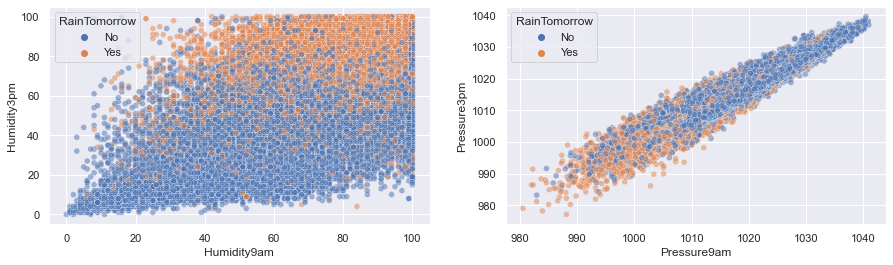

In [129]:
fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Humidity9am', y='Humidity3pm', data=data, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Pressure9am', y='Pressure3pm', data=data, hue='RainTomorrow', alpha=0.5, ax=axs[1])

Ketika nilai humidity tinggi dan pressure rendah kemungkinan akan terjadi hujan besok hari, atau bisa dikatan kedua kolom ini memiliki keterkaitan dan dampak terhadap kolom `RainTomorrow`

Dari hasil EDA ini bisa ditarik kesimpulan sementara bahwa ketika kelembapan tinggi, tekanan rendah, WindGustSpeed tinggi, maka akan terjadi kemungkinan hujan besok harinya.

## Data Preprocessing

### Drop Missing Values

Drop missing values dari kolom target dan beberapa kolom lainnya.

In [130]:
data.dropna(subset=['RainTomorrow'], inplace = True)

In [131]:
data.drop(['Temp9am','Temp3pm','Temp9am'],axis=1, inplace = True)

Dalam kolom Evaporation dan Sunshine, terlalu banyak missing values dan distorsi besar pada data, dan karena variabel-variabel ini dicurigai sebagai MCAR atau Missing Completely At Random saya memutusukan untuk melakukan drop terhdap kolom tersebut.

In [132]:
data.drop(['Evaporation','Sunshine'], axis = 1, inplace = True)

In [133]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
RainToday         1406
RainTomorrow         0
dtype: int64

### Mengecek Cardinality

In [135]:
objek_col = data.select_dtypes(include=['object'])
for cat in objek_col:
  count = len(data[cat].unique())
  print(f"Cardinality of column {cat} is {count}")

Cardinality of column Date is 3436
Cardinality of column Location is 49
Cardinality of column WindGustDir is 17
Cardinality of column WindDir9am is 17
Cardinality of column WindDir3pm is 17
Cardinality of column RainToday is 3
Cardinality of column RainTomorrow is 2


Saya akan memisahkan date ke day, month, dan year, dan men-drop kolom date

In [136]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

data.drop('Date', axis = 1, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    132863 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     132180 non-null  object 
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Cloud9am       88536 non-null   float64
 15  Cloud3pm       85099 non-null   float64
 16  RainToday      140787 non-null  object 
 17  RainTomorrow   142193 non-nul

## Feature Selection

In [137]:
X = data.loc[:, ['Location', 'MinTemp','MaxTemp','WindGustDir','WindGustSpeed','Humidity9am','Pressure3pm','RainToday','month']]
y = data['RainTomorrow']

## Split Data

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 0)


## Handling Missing Value

---
Saya menduga semua nilai yang hilang adalah MCAR atau Missing Completly At Random  karena tidak ada satupun yang memiliki hubungan


### Handling missing value on training set

In [139]:
num_train = X_train._get_numeric_data()
num_train.isnull().sum()

MinTemp            509
MaxTemp            250
WindGustSpeed     7412
Humidity9am       1419
Pressure3pm      11138
month                0
dtype: int64

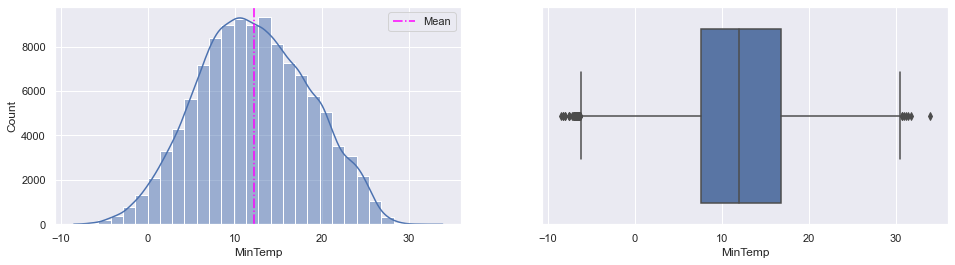

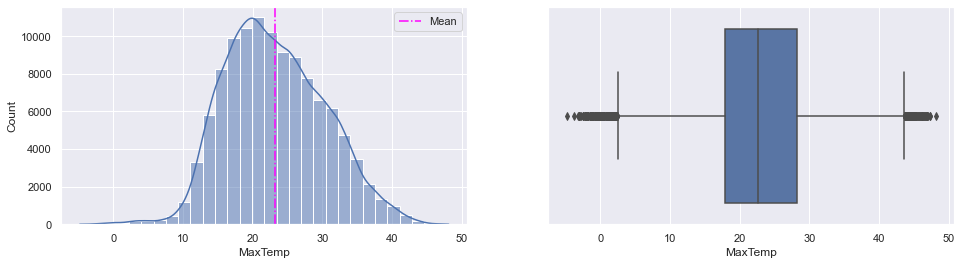

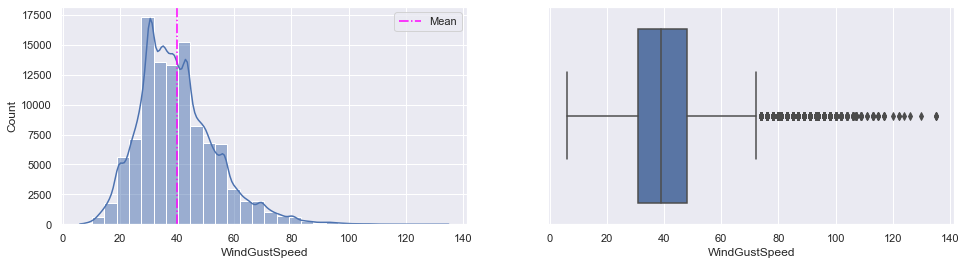

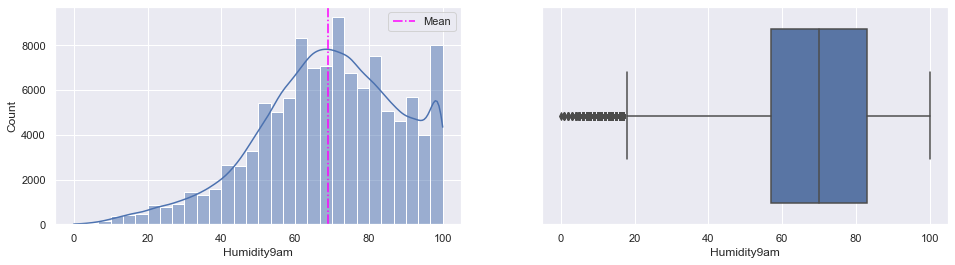

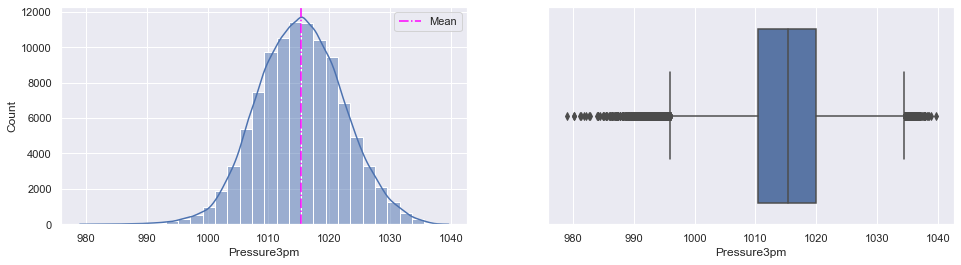

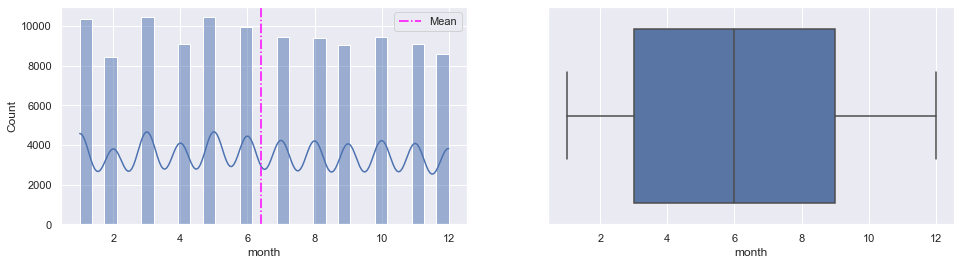

In [140]:
for i in num_train:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_train[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_train[i], ax = axs[1])

  axs[0].axvline(num_train[i].mean(), color='magenta', linestyle='dashdot', label = 'Mean')
  axs[0].legend()

In [141]:
cat_null = X_train.select_dtypes(include=['object']).isnull().sum()
cat_null

Location          0
WindGustDir    7461
RainToday      1100
dtype: int64

In [142]:
mean_impute = ['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm']
median_impute = ['Humidity9am']
mode_impute = ['WindGustDir','RainToday']

for i in mean_impute:
  mean_value = X_train[i].mean()
  X_train[i].fillna(value=mean_value, inplace = True)
for i in median_impute:
  median_value = X_train[i].median()
  X_train[i].fillna(value=median_value, inplace = True)
for i in mode_impute:
  X_train[i].fillna(X_train[i].mode()[0], inplace=True)

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Pressure3pm      0
RainToday        0
month            0
dtype: int64

### Handling Missing Value on Test Set

In [143]:
mean_impute = ['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm']
median_impute = ['Humidity9am']
mode_impute = ['WindGustDir','RainToday']

for i in mean_impute:
  mean_value = X_test[i].mean()
  X_test[i].fillna(value=mean_value, inplace = True)
for i in median_impute:
  median_value = X_test[i].median()
  X_test[i].fillna(value=median_value, inplace = True)
for i in mode_impute:
  X_test[i].fillna(X_test[i].mode()[0], inplace=True)

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Pressure3pm      0
RainToday        0
month            0
dtype: int64

In [144]:
num_test = X_test._get_numeric_data()
num_test.isnull().sum()

MinTemp          0
MaxTemp          0
WindGustSpeed    0
Humidity9am      0
Pressure3pm      0
month            0
dtype: int64

## Handling Outliers

Cara pertama:

In [145]:
num_train = X_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column MinTemp outliers = 0.04%
Column MaxTemp outliers = 0.32%
Column WindGustSpeed outliers = 3.81%
Column Humidity9am outliers = 1.12%
Column Pressure3pm outliers = 1.67%
Column month outliers = 0.00%


In [146]:
outliers_index = []
def outliers_drop(X_train, variable):
  q1 = X_train[variable].quantile(0.25)
  q3 = X_train[variable].quantile(0.75)
  iqr = q3 - q1
  threshold = 1.5 * iqr

  upper_whisker = q3 + threshold
  lower_whisker = q1 - threshold

  for index, x in enumerate(X_train[variable]):
    if x <= lower_whisker or x >= upper_whisker:
      outliers_index.append(index)
  return outliers_index

In [148]:
cols = ['MinTemp','MaxTemp','WindGustSpeed','Humidity9am','Pressure3pm']
print(outliers_index)
print('Shape Y train: ',y_train.shape)
print('Shape_X_train : ',X_train.shape)

[]
Shape Y train:  (113754,)
Shape_X_train :  (113754, 9)


In [149]:
y_train.shape

(113754,)

In [150]:
X_train.shape

(113754, 9)

In [156]:
y_train[1055]

'Yes'

### Handling Outliers on Train Set

In [159]:
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both',  
                          fold=1.5,
                          variables=['MinTemp','MaxTemp','WindGustSpeed','Humidity9am','Pressure3pm'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)

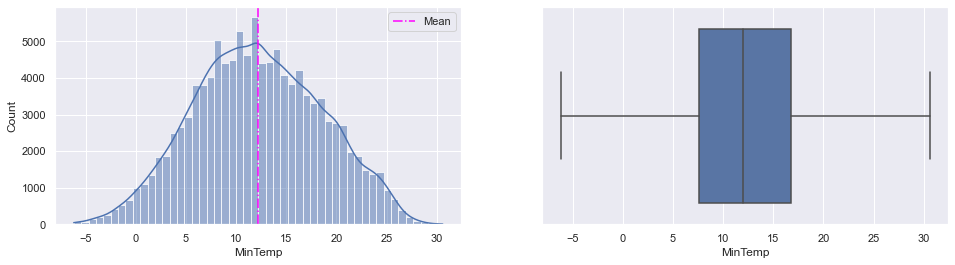

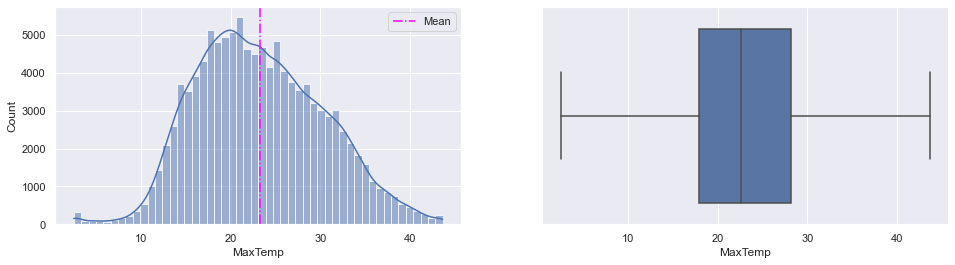

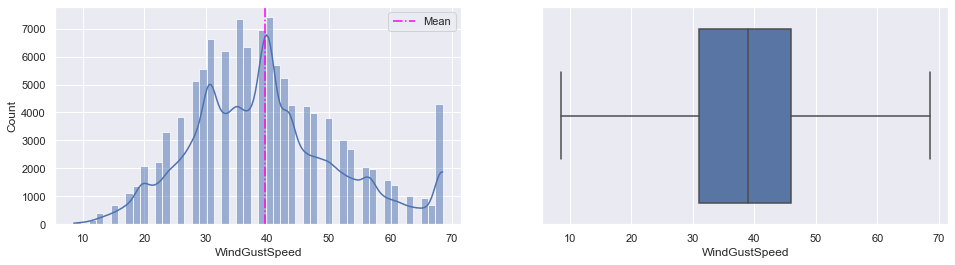

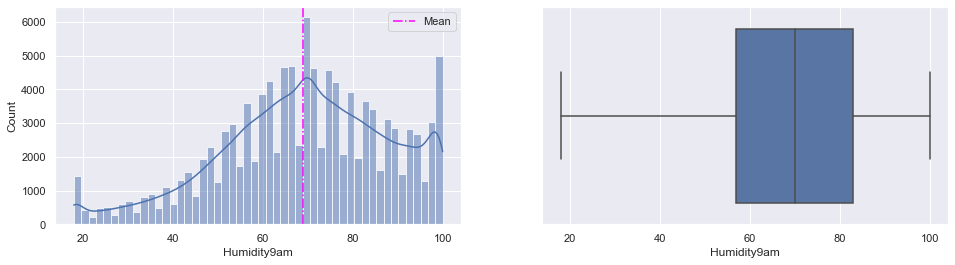

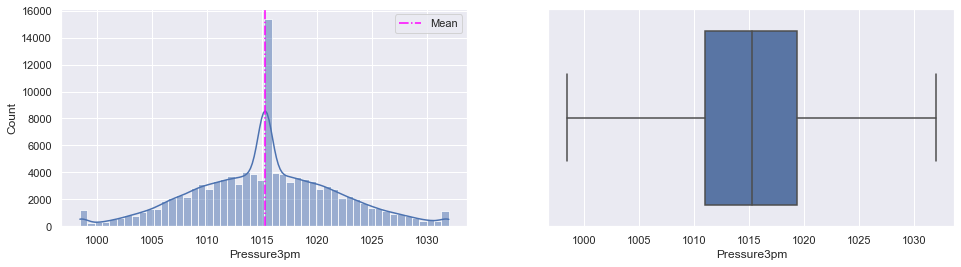

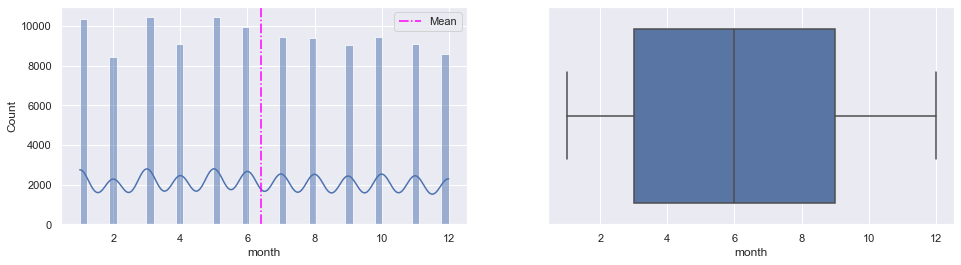

In [161]:
num_train = X_train._get_numeric_data()
for i in num_train:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_train[i], bins = 50, kde=True, ax = axs[0])
  sns.boxplot(num_train[i], ax = axs[1])

  axs[0].axvline(num_train[i].mean(), color='magenta', linestyle='dashdot', label = 'Mean')
  axs[0].legend()

### Handling Outliers on Test Set

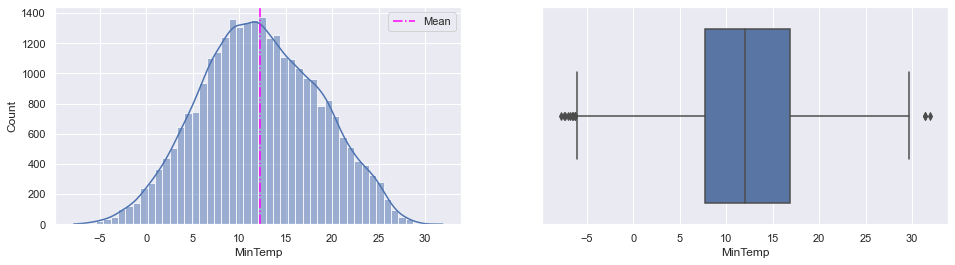

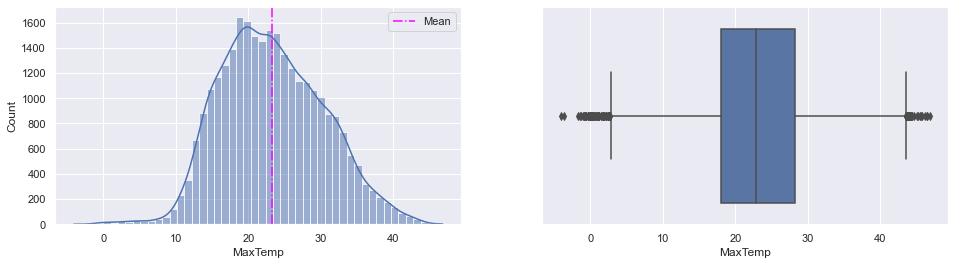

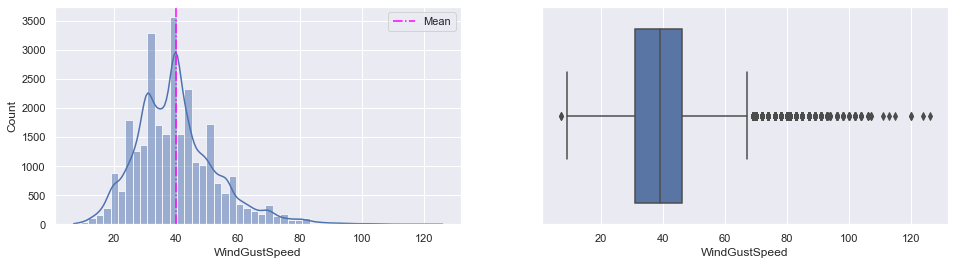

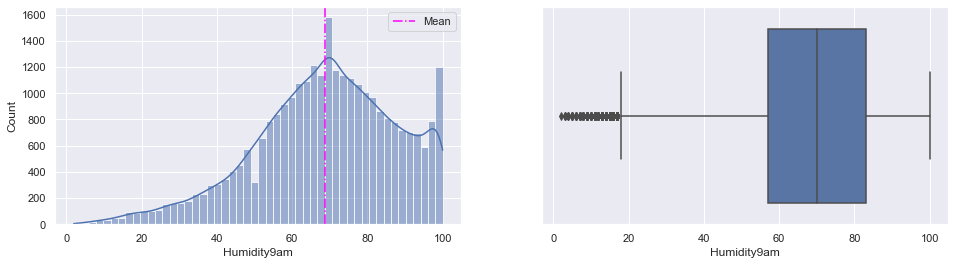

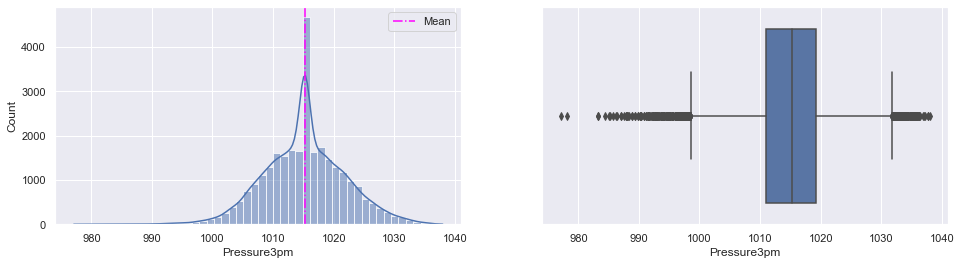

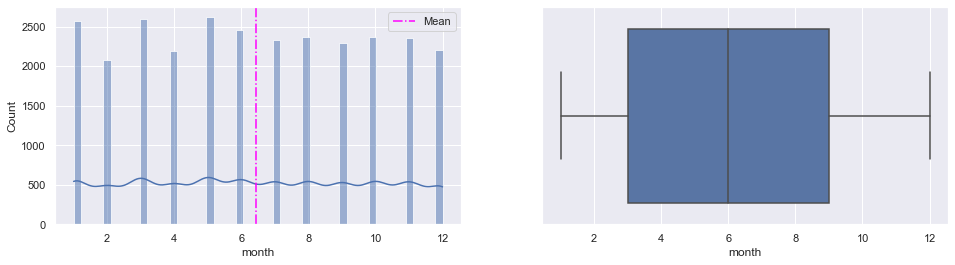

In [162]:
for i in num_test:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_test[i], bins = 50, kde=True, ax = axs[0])
  sns.boxplot(num_test[i], ax = axs[1])

  axs[0].axvline(num_test[i].mean(), color='magenta', linestyle='dashdot', label = 'Mean')
  axs[0].legend()

In [163]:
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both',  
                          fold=1.5,
                          variables=['MinTemp','MaxTemp','WindGustSpeed','Humidity9am','Pressure3pm'])

windsoriser.fit(X_test)

X_test = windsoriser.transform(X_test)

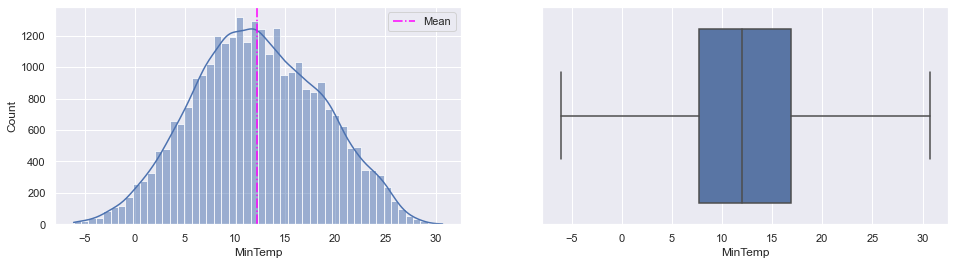

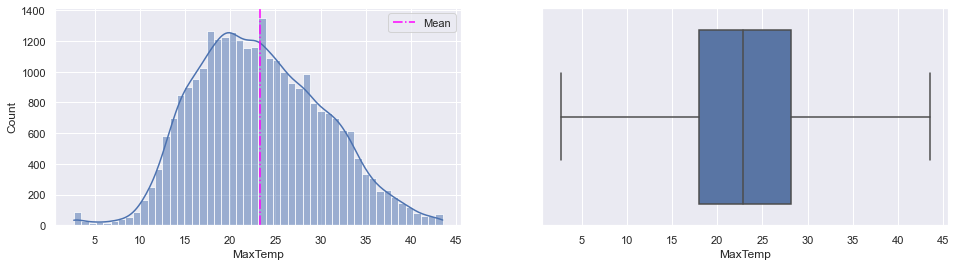

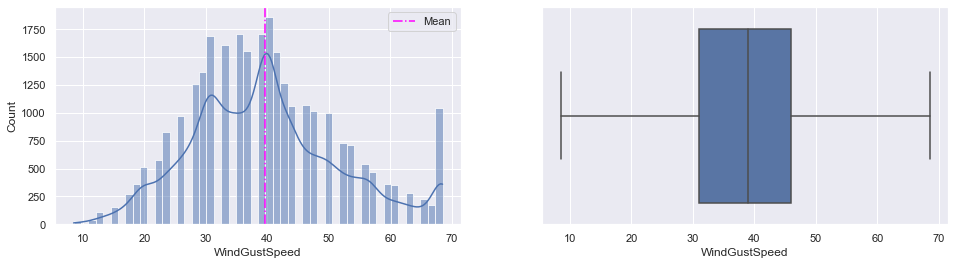

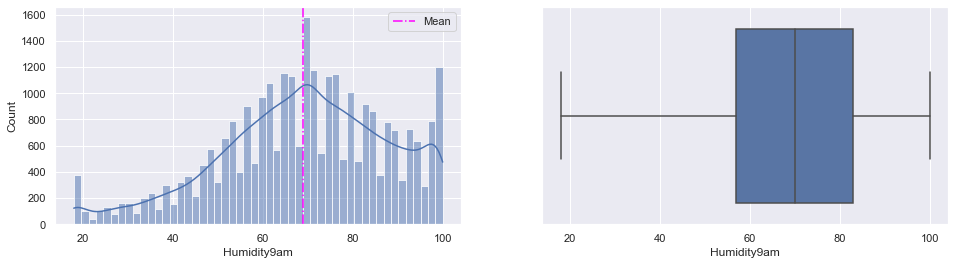

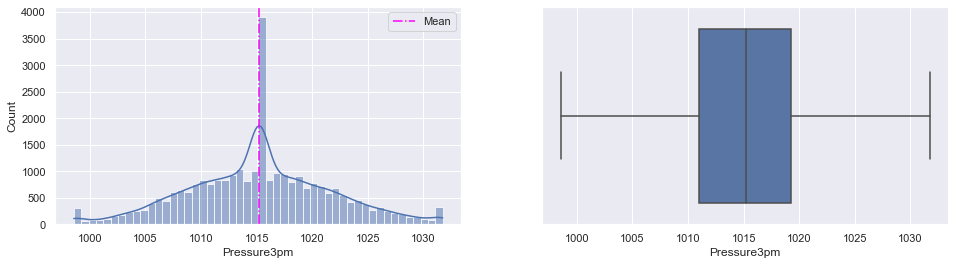

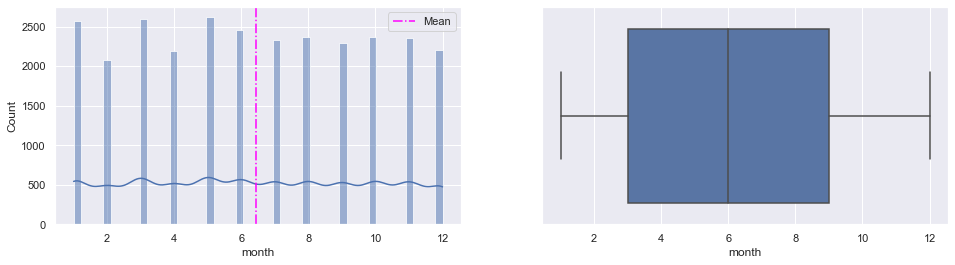

In [165]:
num_test = X_test._get_numeric_data()
for i in num_test:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_test[i], bins = 50, kde=True, ax = axs[0])
  sns.boxplot(num_test[i], ax = axs[1])

  axs[0].axvline(num_test[i].mean(), color='magenta', linestyle='dashdot', label = 'Mean')
  axs[0].legend()

## Feature Encoding

In [166]:
X_train = pd.get_dummies(X_train, prefix='', prefix_sep='', 
                            columns=['Location', 'WindGustDir','RainToday'])
X_test = pd.get_dummies(X_test, prefix='', prefix_sep='', 
                            columns=['Location', 'WindGustDir','RainToday'])

In [167]:
X_train.shape

(113754, 73)

In [169]:
X_train

,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Pressure3pm,month,Adelaide,Albany,Albury,AliceSprings,...,S,SE,SSE,SSW,SW,W,WNW,WSW,No,Yes
1055,8.1,23.5,33.000000,54.0,1014.3,11,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
142359,18.8,35.4,41.000000,69.0,1011.4,4,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
128926,10.2,22.7,31.000000,65.0,1017.7,12,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
88311,23.2,31.0,26.000000,80.0,1006.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
137465,20.1,29.9,52.000000,23.0,1011.5,10,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94763,25.0,32.2,52.000000,74.0,1011.9,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
56551,9.6,23.1,50.000000,62.0,1014.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6422,23.3,37.2,33.000000,46.0,1015.2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18593,19.1,28.1,43.000000,70.0,1010.9,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Build Pipeline

In [171]:
pipe_log = Pipeline([
('scaler', MinMaxScaler()), 
('logreg', LogisticRegression(random_state=0))])

pipe_svm = Pipeline([
('scaler', MinMaxScaler()),
('svc', SVC(random_state=0))])

## Modelling & Evaluation

**Linear Regression**

In [172]:
pipe_log.fit(X_train, y_train)
print('Training Score: ',round(pipe_log.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_log.score(X_test, y_test),4))

Training Score:  0.8218
Testing Score:  0.8202


In [173]:
y_logreg_pred = pipe_log.predict(X_test)
y_logreg_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

**Confusion Matrix**

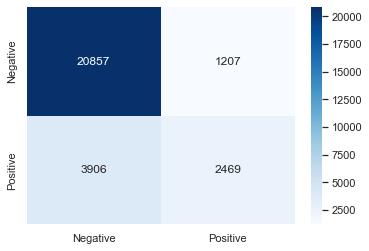

In [174]:
cf_matrix_logreg = confusion_matrix(y_test, y_logreg_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_logreg, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

In [176]:
print(classification_report(y_test, y_logreg_pred))

              precision    recall  f1-score   support

          No       0.84      0.95      0.89     22064
         Yes       0.67      0.39      0.49      6375

    accuracy                           0.82     28439
   macro avg       0.76      0.67      0.69     28439
weighted avg       0.80      0.82      0.80     28439



**SVM**

In [53]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.8403
Testing Score:  0.8305


In [177]:
y_svm_pred = pipe_log.predict(X_test)
y_svm_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

**Confusion Matrix**

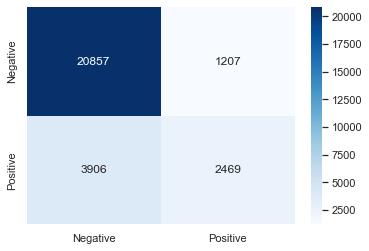

In [178]:
cf_matrix_svm = confusion_matrix(y_test, y_svm_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_svm, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

In [179]:
cf_matrix_svm

array([[20857,  1207],
       [ 3906,  2469]], dtype=int64)

In [180]:
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

          No       0.84      0.95      0.89     22064
         Yes       0.67      0.39      0.49      6375

    accuracy                           0.82     28439
   macro avg       0.76      0.67      0.69     28439
weighted avg       0.80      0.82      0.80     28439



## Model Inference

---

In [181]:
data_inference = data.sample(4000)
data_inference

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
116452,PearceRAAF,11.9,27.4,0.0,SSW,44.0,SSW,WSW,13.0,28.0,...,41.0,1011.8,1009.6,NaN,NaN,No,No,2014,4,6
70252,Melbourne,18.5,30.7,0.0,N,44.0,NNE,N,13.0,19.0,...,53.0,1007.2,1004.2,7.0,7.0,No,Yes,2017,2,5
82245,Dartmoor,6.7,12.2,35.0,SSW,48.0,SSW,SSW,20.0,22.0,...,83.0,1016.4,1018.1,NaN,NaN,Yes,Yes,2012,7,1
30848,Sydney,17.3,24.4,0.0,NaN,NaN,S,SSE,26.0,30.0,...,61.0,1015.6,1015.6,0.0,5.0,No,No,2009,12,4
48309,Canberra,3.6,13.6,1.4,W,48.0,NW,WSW,17.0,26.0,...,46.0,1004.6,1006.1,7.0,NaN,Yes,No,2015,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29420,Richmond,6.6,15.3,0.2,SW,54.0,SW,SW,17.0,20.0,...,35.0,1015.5,1017.3,2.0,1.0,No,No,2015,6,1
52501,MountGinini,10.6,13.4,11.0,ENE,33.0,NE,WNW,17.0,11.0,...,99.0,NaN,NaN,NaN,NaN,Yes,Yes,2010,2,13
37464,WaggaWagga,0.6,18.4,0.0,E,15.0,E,WSW,9.0,7.0,...,54.0,1031.5,1026.9,2.0,1.0,No,No,2011,8,24
47616,Canberra,5.9,11.5,0.0,WNW,59.0,NW,WNW,22.0,30.0,...,57.0,1011.0,1009.6,8.0,8.0,No,No,2013,8,19


### Feature Selection

In [182]:
X_inf = data_inference.loc[:, ['Location', 'MinTemp','MaxTemp','WindGustDir','WindGustSpeed','Humidity9am','Pressure3pm','RainToday','month']]
y_inf = data_inference['RainTomorrow']

In [183]:
print(X_inf.shape)
print(y_inf.shape)

(4000, 9)
(4000,)


In [184]:
X_inf

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity9am,Pressure3pm,RainToday,month
116452,PearceRAAF,11.9,27.4,SSW,44.0,71.0,1009.6,No,4
70252,Melbourne,18.5,30.7,N,44.0,61.0,1004.2,No,2
82245,Dartmoor,6.7,12.2,SSW,48.0,99.0,1018.1,Yes,7
30848,Sydney,17.3,24.4,NaN,NaN,69.0,1015.6,No,12
48309,Canberra,3.6,13.6,W,48.0,72.0,1006.1,Yes,7
...,...,...,...,...,...,...,...,...,...
29420,Richmond,6.6,15.3,SW,54.0,54.0,1017.3,No,6
52501,MountGinini,10.6,13.4,ENE,33.0,99.0,NaN,Yes,2
37464,WaggaWagga,0.6,18.4,E,15.0,86.0,1026.9,No,8
47616,Canberra,5.9,11.5,WNW,59.0,69.0,1009.6,No,8


In [185]:
y_inf

116452     No
70252     Yes
82245     Yes
30848      No
48309      No
         ... 
29420      No
52501     Yes
37464      No
47616      No
8605       No
Name: RainTomorrow, Length: 4000, dtype: object

### Handling Missing Value

In [186]:
X_inf.isnull().sum()

Location           0
MinTemp           17
MaxTemp           13
WindGustDir      276
WindGustSpeed    274
Humidity9am       50
Pressure3pm      382
RainToday         46
month              0
dtype: int64

In [187]:
mean_impute = ['MinTemp','MaxTemp','WindGustSpeed','Pressure3pm']
median_impute = ['Humidity9am']
mode_impute = ['WindGustDir','RainToday']

for i in mean_impute:
  mean_value = X_inf[i].mean()
  X_inf[i].fillna(value=mean_value, inplace = True)
for i in median_impute:
  median_value = X_inf[i].median()
  X_inf[i].fillna(value=median_value, inplace = True)
for i in mode_impute:
  X_inf[i].fillna(X_inf[i].mode()[0], inplace=True)

X_inf.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Pressure3pm      0
RainToday        0
month            0
dtype: int64

In [188]:
X_inf

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity9am,Pressure3pm,RainToday,month
116452,PearceRAAF,11.9,27.4,SSW,44.000000,71.0,1009.60000,No,4
70252,Melbourne,18.5,30.7,N,44.000000,61.0,1004.20000,No,2
82245,Dartmoor,6.7,12.2,SSW,48.000000,99.0,1018.10000,Yes,7
30848,Sydney,17.3,24.4,W,40.226785,69.0,1015.60000,No,12
48309,Canberra,3.6,13.6,W,48.000000,72.0,1006.10000,Yes,7
...,...,...,...,...,...,...,...,...,...
29420,Richmond,6.6,15.3,SW,54.000000,54.0,1017.30000,No,6
52501,MountGinini,10.6,13.4,ENE,33.000000,99.0,1015.08314,Yes,2
37464,WaggaWagga,0.6,18.4,E,15.000000,86.0,1026.90000,No,8
47616,Canberra,5.9,11.5,WNW,59.000000,69.0,1009.60000,No,8


### Handling Outliers

In [189]:
num_inf = X_inf._get_numeric_data()
for k, v in num_inf.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_inf)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column MinTemp outliers = 0.10%
Column MaxTemp outliers = 0.38%
Column WindGustSpeed outliers = 3.75%
Column Humidity9am outliers = 1.23%
Column Pressure3pm outliers = 1.48%
Column month outliers = 0.00%


In [190]:
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['MinTemp','MaxTemp','WindGustSpeed','Humidity9am','Pressure3pm'])

windsoriser.fit(X_inf)

X_inf = windsoriser.transform(X_inf)

In [191]:
def diagnostic_plots(X_inf, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_inf[variable])
    plt.title('Boxplot')

    plt.show()

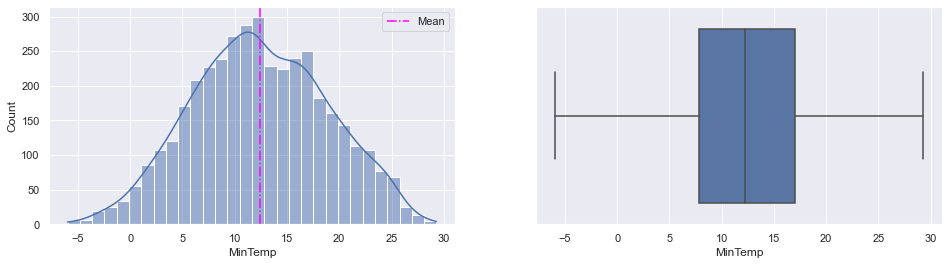

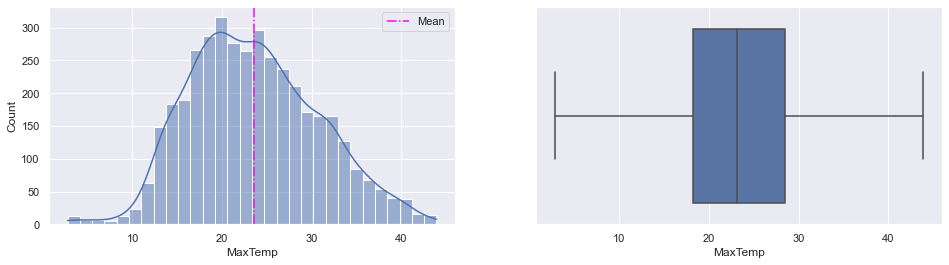

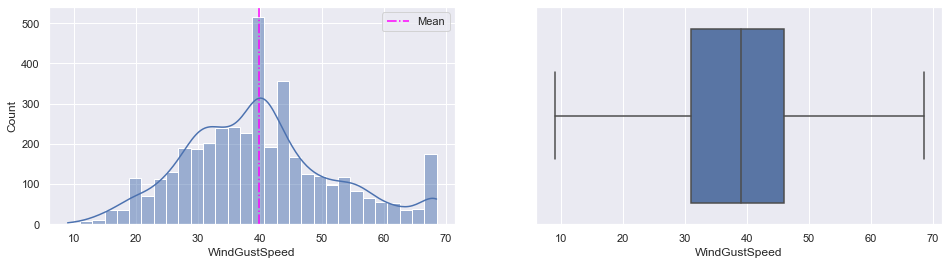

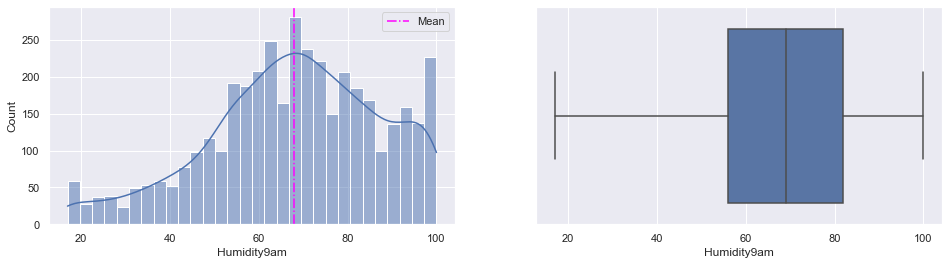

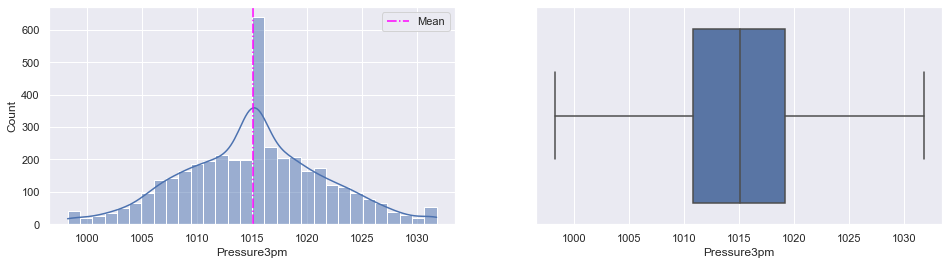

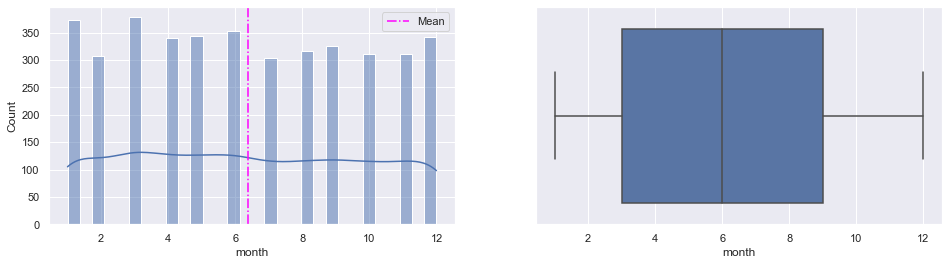

In [192]:
num_test = X_inf._get_numeric_data()
for i in num_test:
  fig, axs = plt.subplots(1,2,figsize=(16, 4))
  sns.histplot(num_test[i], bins = 30, kde=True, ax = axs[0])
  sns.boxplot(num_test[i], ax = axs[1])

  axs[0].axvline(num_test[i].mean(), color='magenta', linestyle='dashdot', label = 'Mean')
  axs[0].legend()

### Feature Encoding

In [193]:
X_inf = pd.get_dummies(X_inf, prefix='', prefix_sep='', 
                            columns=['Location', 'WindGustDir','RainToday'])

Build Pipeline

In [194]:
pipe_svm = Pipeline([
('scaler', MinMaxScaler()),
('svc', SVC(random_state=0))])

## Modelling & Evaluation

In [195]:
pipe_svm.fit(X_inf, y_inf)
print('Score: ',round(pipe_svm.score(X_inf, y_inf),4))

Score:  0.8385


In [196]:
X_inf.shape

(4000, 73)

In [197]:
y_inv_pred = pipe_svm.predict(X_inf)
y_inv_pred

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [199]:
yes = 0
no = 0
for i in y_inv_pred:
  if i == 'Yes':
    yes+=1
  else:
    no+=1
print('Persentase YES:', round(yes/len(y_inv_pred),2)*100, '%')
print('Persentase NO:', round(no/len(y_inv_pred),2)*100, '%')

Persentase YES: 9.0 %
Persentase NO: 91.0 %


## Kesimpulan

---

Dengan menggunakan dataset tentang Hujan/Rain di Australia dapat ditarik beberapa kesimpulan, diantaranya: 

Terdapat beberapa features yang memiliki korelasi diatas 85%:

*   MinTemp - Temp9am (90%)
*   MaxTemp - Temp3pm (98%)
* MaxTemp - Temp9am (90%)
* Pressure9am - Pressure3pm (96%)
* Temp9am - Temp3pm (86%)

Ada juga beberapa faktot yang menyebabkan potensi kemungkinan terjadinya hujan pada besok hari yaitu:

* Saat humidity tinggi
* pressure rendah
* WindGustSpeed tinggi

Features/Kolom yang sata pertahankan dalam proses analisis data adalah:
Location         ,
MinTemp          ,
MaxTemp          ,
WindGustDir      ,
WindGustSpeed    ,
Humidity9am      ,
Pressure3pm      ,
RainToday        ,
month.

Dengan menggunakan 2 model machine learning yang berbada yaitu Logistic Regression dan SVM, dapat disimpulkan berdasarkan analisis yang saya lakukan sebagai berikut:

**Score Logistic Regression** dalam data train dan data test score mencapai **82%** sedangkan dalam model **SVM** data train score yaitu 84% dan data test score mencapai 83%, artinya nilai tersebut sedikit lebih besar 1% dalam data train score dibanding data test score tetapi saya masih mentolerir perbedaan nilai tersebut sehingga model masih bisa dikatakan `good fit` atau tidak mengalami underfitting ataupun overfitting.

Sedangkan untuk **F1 Score**,  kedua model baik itu **SVM atau Logistic Regression** memiliki score yang sama yaitu **82%**

Berdasarkan hasil analisi dan juga permodelan yang dilakukan, persentase terjadinya hujan untuk `RainTomorrow` yaitu sebesar:

- Persentase YES: 9.0 %
- Persentase NO : 91.0 %

---